In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV


import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import validate_model_classification_smote, hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = 'data/preprocessed_dataset.csv'
df = pd.read_csv(dataset_file_path)
df.sample(5)

,"PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro",IGF-1 ng/ml (N: 100-311),proBNP,"AMH (ng/ml) *7,14=pmol/l",weight,height (cm),BMI,systolic BP (ciśnienie skurczowe),diastolic BP (ciśnienie rozskurczowe),Hypertension,Waist Circumference (WC),WC>88,Hip Circumference (HC),WHR (Waist/Hip ratio),"WHR>0,85 (WHO)","WHR>0,8 (NIDDK)",WHTR (Waist/Height Ratio),"WHTR>0,5","overweight/obesity 0-normal/low, 1-overweight, 2-obesity","irregular cycles (0-nie, 1-tak)","ovulation (0-brak, 1-obecna)","PCO ovary morfology in USG (0-brak, 1--obecna)","stromal hypertrophy in ovary (0-brak, 1-obecny)",acne,hirsutism,FG score (Ferriman-Gallway score - stopień androgenizacji),hyperandrogenism,hypothyroidism,Volume of the thyroid Right Lobe,Volume of the thyroid Left Lobe,thyroid volume,"nodules 0-lack, 1-RL, 2-LL, 3-both",chronic thyroiditis,Vole of the Right Ovary,Volume of the Left Ovary,ovaries volume - total,follicules >12,WBC x10^3/ul,neutrophil x10^3/ul,lymphocytes x10^3/ul,monocytes x10^3/ul,eosinocytes x10^3/ul,basophils x10^3/ul,% neutrophil,% lymphocytes,% monocytes,%eosinocytes,%basophils,RBC x10^6ul,Hemoglobin [g/dl],hematocrit [%],HTC/Hb,MCV fl,MCH pg,MCHC g/dl,RDW-CV %,PLT x10^3/ul,PDW fl,MPV fl,P-LCR %,PLT/WBC,MPV/PLT,PLR,limf/mono,NLR (stosunek neutrofili do limfocytów),L/WCC (leukocyty do całkowitej liczby krwinek białych),eos/leukocyty,sodium mmol/l,potassium mmol/l,calcium mg/dl,phosphorus mg/dl,creatinine mg/dl,CRP mg/l,ALT U/l,AST U/l,Bilirubin mg/dl,CHOL mg/dl,CHOL mmol/l,CHOL>200,HDL mg/dl,HDL mmol/l,HDL<50,LDL mg/dl,LDL mmol/l,LDL>135,TG,TG mmol/l,Atherogenic index (AI) (LDL-C/HDL-C),coronary risk index (CRI) (TG/HDL-C),VAI - Visceral adiposity index,BAI - Body adiposity index,LAP INDEX - Lipid accumulation product index,TyG Index - Trigliceride-glucose index,AIP -Atherogenic index of plasma,UIBC ug/dl,ferrum ug/dl,TIBC,TSAT,ferritin ng/ml,glucose 0 mg/dl,glucose 120 mg/dl,insulin 0 uU/ml,Insulin 120 uU/ml,HOMA,Matsuda,"QUICKI (N<0,357)",TSH mIU/L,FT3 pmol/l,FT4 pmol/l,Anty-TPO IU/ml,Anty-TG IU/ml,FSH mlU/ml,LH,LH/FSH,prolactin,DHEA-S ug/dl,testosterone nmol/l,T (ng/ml),T/SHBG,E(pg/ml)/T(ng/ml)/,Parathormone pg/ml,cortisol nmol/l 8:00,cortisol nmol/l 18:00,Estradiol pg/ml,SHBG nmol/l,FTI (free testosterone index),ACTH pg/ml,HbA1c %,vitamin 25-OH D ng/ml,Androstendione ng/ml,17-OH-progesterone ng/ml,Dihydrotestosterone pg/ml (N<368),Testosterone/DHT,T/A (testosterone/androstendione),age
872,2,NaN,27.81,NaN,47.0,171.0,16.073322,130.0,70.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,5.888,3.2175,9.1055,2.0,0.0,3.5300,6.1500,9.6800,0.0,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33,13.0,39.5,3.038462,91.2,30.0,32.9,11.4,231.0,15.8,11.6,39.3,49.570815,0.050216,NaN,NaN,NaN,NaN,NaN,144.0,4.54,9.74,NaN,0.94,0.8,30.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,6.40,NaN,1.264198,NaN,0.369103,0.80,3.68,14.70,13.0,21.0,NaN,0.6,NaN,550.0,213.0,1.50,0.432277,0.009591,11.566667,24.41,NaN,NaN,5.0,156.4,0.94,23.01,NaN,82.0,NaN,NaN,NaN,NaN,NaN,28.0
17,0,213.0,NaN,3.83000,93.0,157.0,37.729725,122.0,84.0,0.0,105.0,1.0,115.0,0.913043,1.0,1.0,0.668790,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9.000,5.7375,14.7375,0.0,1.0,4.3700,6.0996,10.4696,0.0,9.86,6.43,2.60,0.78,0.00,0.05,65.2,26.4,7.9,0.0,0.5,5.39,15.0,44.6,2.973333,82.7,27.8,33.6,12.6,282.0,12.4,10.9,30.8,28.600406,0.038652,108.461538,3.333333,2.473077,0.263692,0.000000,141.0,4.44,9.27,2.98,0.96,11.1,13.0,17.0,0.71,131.0,3.38766,0.0,45.0,1.16370,1.0,70.9,1.833474,0.0,74.0,0.83546,1.575556,1.644444,1.311157,55.248408,39.26662,4.428971,0.216019,181.0,145.0,326.0,44.0,131.0,95.0,143.0,14.09,113.80,3.305062,2.14,0.319833,1.74,5.77,16.52,7.0,97.0,1.8,3.4,1.888889,325.0,167.0,1.30,0.374640,0.041139,477.792304,25.94,334.0,106.0,179.0,31.6,4.12,35.55,5.2,21.0,2.80,4.18,210.0,0.006190,0.464286,23.0
222,0,186.0,NaN,NaN,64.0,170.0,22.145329,128.0,92.0,0.0,74.0,0.0,90.0,0.822222,0.0,1.0,0.435

(999, 135)


<Axes: >

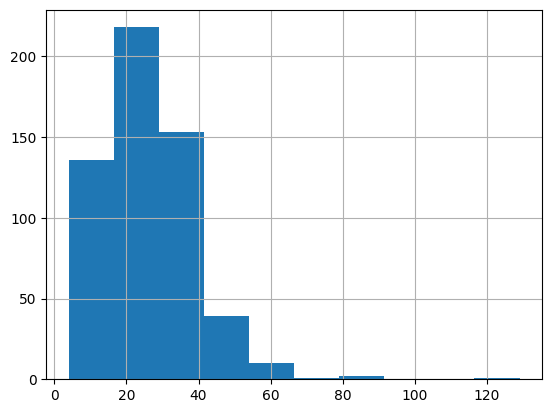

In [3]:
print(df.shape)
df[VITAMINE_D].hist()

## Discretize Vit D

In [4]:
VIT_D_DISCRETE = 'Vit d discretized 0-low, 1-normal, 2-high'
CLASS_NAMES = ['low', 'normal', 'high']

In [5]:
def discretize_vit_d(value):
    if value < 31:
        return 0
    elif 31 <= value <= 50:
        return 1
    else:
        return 2

# Apply the discretization function to the 'Vit_d' column
df[VIT_D_DISCRETE] = df[VITAMINE_D].apply(discretize_vit_d)
df.drop(VITAMINE_D, axis=1, inplace=True)
# Check the first few rows of the DataFrame to see the results
df.head()

,"PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro",IGF-1 ng/ml (N: 100-311),proBNP,"AMH (ng/ml) *7,14=pmol/l",weight,height (cm),BMI,systolic BP (ciśnienie skurczowe),diastolic BP (ciśnienie rozskurczowe),Hypertension,Waist Circumference (WC),WC>88,Hip Circumference (HC),WHR (Waist/Hip ratio),"WHR>0,85 (WHO)","WHR>0,8 (NIDDK)",WHTR (Waist/Height Ratio),"WHTR>0,5","overweight/obesity 0-normal/low, 1-overweight, 2-obesity","irregular cycles (0-nie, 1-tak)","ovulation (0-brak, 1-obecna)","PCO ovary morfology in USG (0-brak, 1--obecna)","stromal hypertrophy in ovary (0-brak, 1-obecny)",acne,hirsutism,FG score (Ferriman-Gallway score - stopień androgenizacji),hyperandrogenism,hypothyroidism,Volume of the thyroid Right Lobe,Volume of the thyroid Left Lobe,thyroid volume,"nodules 0-lack, 1-RL, 2-LL, 3-both",chronic thyroiditis,Vole of the Right Ovary,Volume of the Left Ovary,ovaries volume - total,follicules >12,WBC x10^3/ul,neutrophil x10^3/ul,lymphocytes x10^3/ul,monocytes x10^3/ul,eosinocytes x10^3/ul,basophils x10^3/ul,% neutrophil,% lymphocytes,% monocytes,%eosinocytes,%basophils,RBC x10^6ul,Hemoglobin [g/dl],hematocrit [%],HTC/Hb,MCV fl,MCH pg,MCHC g/dl,RDW-CV %,PLT x10^3/ul,PDW fl,MPV fl,P-LCR %,PLT/WBC,MPV/PLT,PLR,limf/mono,NLR (stosunek neutrofili do limfocytów),L/WCC (leukocyty do całkowitej liczby krwinek białych),eos/leukocyty,sodium mmol/l,potassium mmol/l,calcium mg/dl,phosphorus mg/dl,creatinine mg/dl,CRP mg/l,ALT U/l,AST U/l,Bilirubin mg/dl,CHOL mg/dl,CHOL mmol/l,CHOL>200,HDL mg/dl,HDL mmol/l,HDL<50,LDL mg/dl,LDL mmol/l,LDL>135,TG,TG mmol/l,Atherogenic index (AI) (LDL-C/HDL-C),coronary risk index (CRI) (TG/HDL-C),VAI - Visceral adiposity index,BAI - Body adiposity index,LAP INDEX - Lipid accumulation product index,TyG Index - Trigliceride-glucose index,AIP -Atherogenic index of plasma,UIBC ug/dl,ferrum ug/dl,TIBC,TSAT,ferritin ng/ml,glucose 0 mg/dl,glucose 120 mg/dl,insulin 0 uU/ml,Insulin 120 uU/ml,HOMA,Matsuda,"QUICKI (N<0,357)",TSH mIU/L,FT3 pmol/l,FT4 pmol/l,Anty-TPO IU/ml,Anty-TG IU/ml,FSH mlU/ml,LH,LH/FSH,prolactin,DHEA-S ug/dl,testosterone nmol/l,T (ng/ml),T/SHBG,E(pg/ml)/T(ng/ml)/,Parathormone pg/ml,cortisol nmol/l 8:00,cortisol nmol/l 18:00,Estradiol pg/ml,SHBG nmol/l,FTI (free testosterone index),ACTH pg/ml,HbA1c %,Androstendione ng/ml,17-OH-progesterone ng/ml,Dihydrotestosterone pg/ml (N<368),Testosterone/DHT,T/A (testosterone/androstendione),age,"Vit d discretized 0-low, 1-normal, 2-high"
0,0,254.0,41.82,NaN,51.5,164.5,19.031605,105.0,67.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,NaN,1.0,1.0,5.0,NaN,1.0,4.203225,3.057936,7.261161,NaN,NaN,9.090000,9.587292,18.677292,1.0,5.14,2.54,1.90,0.44,0.18,0.06,49.3,37.4,8.6,3.5,1.2,4.09,12.1,34.0,2.809917,83.1,29.6,35.6,12.1,234.0,10.5,9.7,22.8,45.525292,0.041453,123.157895,4.318182,1.336842,0.369650,0.035019,144.0,3.91,9.80,3.76,0.76,0.8,23.0,23.0,0.23,156.0,4.03416,0.0,66.0,1.70676,0.0,81.0,2.094660,0.0,52.0,0.58708,1.227273,0.787879,NaN,NaN,NaN,4.208576,-0.103541,247.0,40.0,287.0,14.0,38.0,87.0,78.0,8.54,23.89,1.834519,10.03,0.348313,4.04,4.59,15.69,14.0,10.0,10.02,13.2,1.317365,299.0,14.0,0.1,0.028818,0.000745,2567.799983,17.70,373.0,231.0,74.0,134.2,NaN,256.10,5.0,1.26,1.03,30.0,NaN,0.079365,NaN,1
1,0,276.0,265.00,NaN,57.0,167.0,20.438166,104.0,58.0,0.0,71.0,0.0,91.0,0.780220,0.0,0.0,0.425150,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.515000,3.633500,8.148500,0.0,0.0,3.313600,5.122300,8.435900,0.0,10.86,6.26,3.83,0.52,0.18,0.07,57.6,35.3,4.8,1.7,0.6,3.97,12.9,35.9,2.782946,90.4,32.5,35.9,12.1,284.0,12.3,10.6,29.6,26.151013,0.037324,74.151436,7.365385,1.634465,0.352670,0.016575,140.0,3.31,9.14,3.51,0.93,0.3,7.0,11.0,0.68,146.0,3.77556,0.0,77.0,1.99122,0.0,47.2,1.220592,0.0,110.0,1.24190,0.612987,1.428571,1.104891,36.491018,16.14470,4.528595,0.154902,147.0,129.0,276.0,47.0,70.0,78.0,105.0,5.77,56.19,1.111259,8.85,0.376893,3.73,5.18,15.83,11.0,10.0,4.50,6.2,1.377778,443.0,7.0,0.1,0.028818,0.000500,173.499999,23.12,65.0,733.0,5.0,200.0,NaN,86.2

<Axes: >

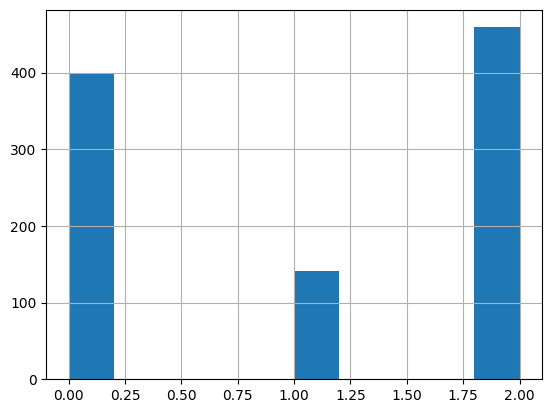

In [6]:
df[VIT_D_DISCRETE].hist()

# Model selection for VIT D

In [7]:
df_cleaned = df.dropna(subset=[VIT_D_DISCRETE])

X, y = df_cleaned.drop(columns=[VIT_D_DISCRETE]), df_cleaned[VIT_D_DISCRETE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Best preprocessing

In [8]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(VIT_D_DISCRETE))
    ])

### For smote

In [9]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

## Hyperparameter tuning

### Decision Tree

In [31]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 6, 9],
    'model__min_samples_split': [4, 6],
    'model__min_samples_leaf': [4, 6],
    'model__class_weight': [None, 'balanced'],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, VIT_D_DISCRETE, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 24 candidates, totalling 360 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}
Best score (f1_weighted): 0.5936233426584688


,params,mean_train_score,mean_test_score
1,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}",0.668853,0.593623
0,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}",0.668853,0.593283
2,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 6, 'model__min_samples_split': 4}",0.666265,0.589199
3,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 6, 'model__min_samples_split': 6}",0.666265,0.589199
5,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}",0.804393,0.585840
7,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 6, 'model__min_samples_split': 6}",0.788218,0.585065
6,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 6, 'model__min_samples_split': 4}",0.788224,0.583877
4,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}",0.804562,0.579440
8,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 9, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}",0.882432,0.576804
9,"{'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 9, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}",0.883041,0.575000


In [27]:
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

# tuned_df = compare_random_states(X_train, y_train, model, VIT_D_DISCRETE, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits


Best parameters: {'model__C': 5}
Best score (f1_weighted): 0.5825965954458329


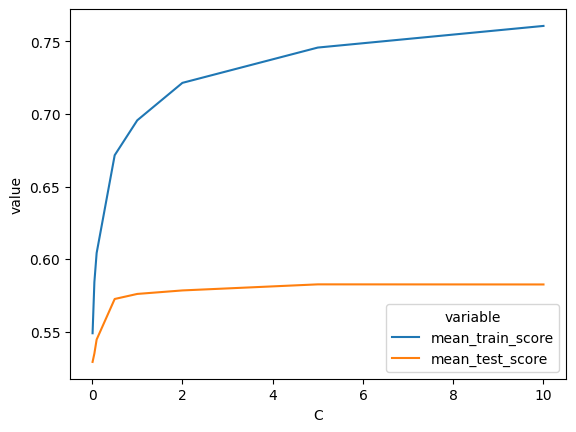

,C,mean_train_score,mean_test_score
0,0.01,0.548924,0.529171
1,0.05,0.584126,0.534944
2,0.1,0.604154,0.544579
3,0.5,0.671550,0.572523
4,1,0.695601,0.576004
5,2,0.721389,0.578417
6,5,0.745710,0.582597
7,10,0.760614,0.582527


In [28]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, VIT_D_DISCRETE, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.5

### Random Forest

In [29]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, VIT_D_DISCRETE, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}
Best score (f1_weighted): 0.680602728270292


,params,mean_train_score,mean_test_score
6,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.979450,0.680603
8,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.979036,0.677973
5,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.985821,0.676999
2,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.991031,0.675616
4,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.985296,0.675075
7,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.978825,0.675004
3,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.985086,0.672433
0,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.991866,0.671284
1,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.991554,0.670514


In [30]:
# model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

# tuned_df = compare_random_states(X_train, y_train, model, VIT_D_DISCRETE, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

### SVM

In [ ]:
# model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

# param_grid_svc = {
#     'model__kernel': ['linear', 'rbf', 'sigmoid'],
#     'model__C': [0.1, 1, 10, 100],
#     'model__gamma': [0.1, 1, 10],
#     'model__epsilon': [0.1, 0.2, 0.3],
# }

# svc_h_scores = hyperparameter_tuning_general(X_train, y_train, VIT_D_DISCRETE, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
# svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

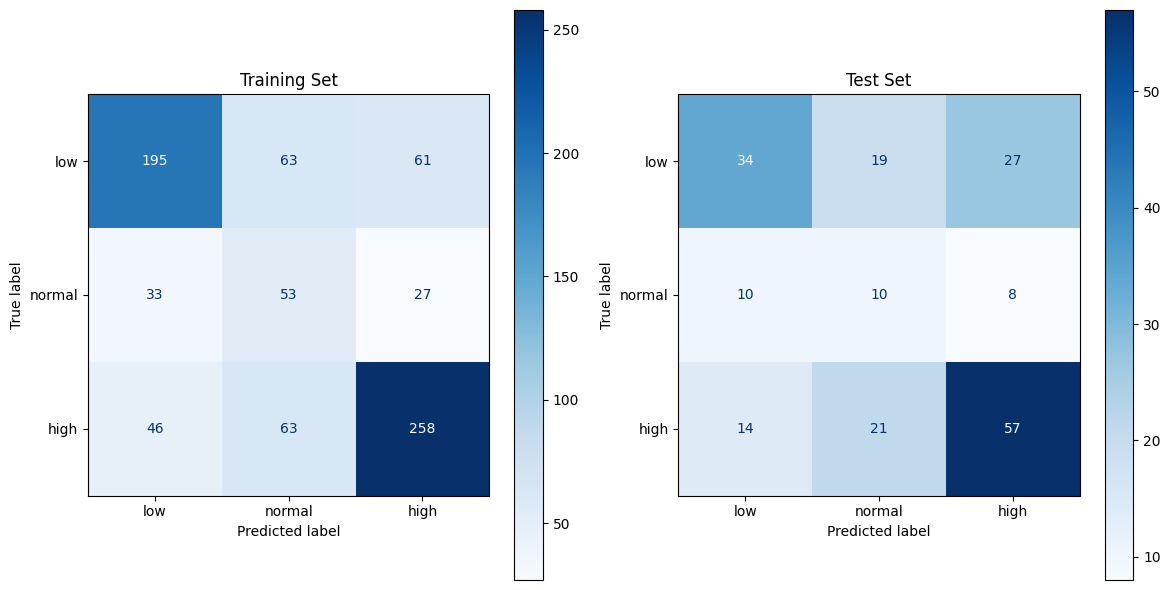

Training set
              precision    recall  f1-score   support

         low       0.71      0.61      0.66       319
      normal       0.30      0.47      0.36       113
        high       0.75      0.70      0.72       367

    accuracy                           0.63       799
   macro avg       0.58      0.59      0.58       799
weighted avg       0.67      0.63      0.65       799

Test set
              precision    recall  f1-score   support

         low       0.59      0.42      0.49        80
      normal       0.20      0.36      0.26        28
        high       0.62      0.62      0.62        92

    accuracy                           0.51       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.55      0.51      0.52       200



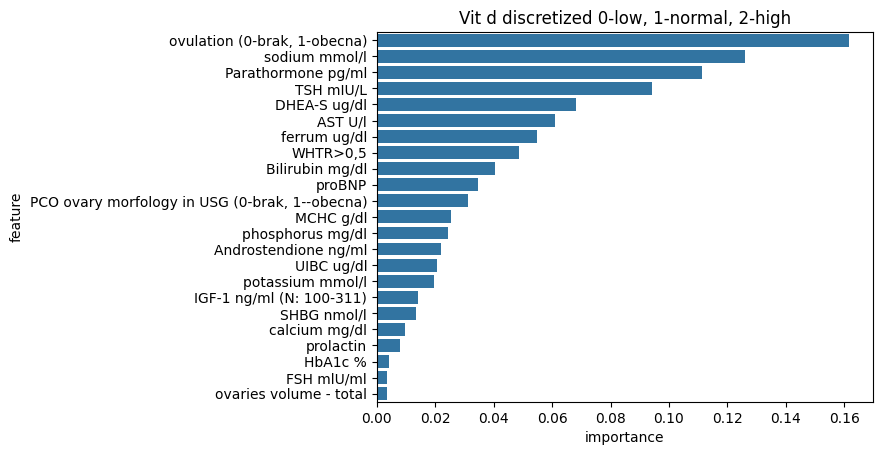

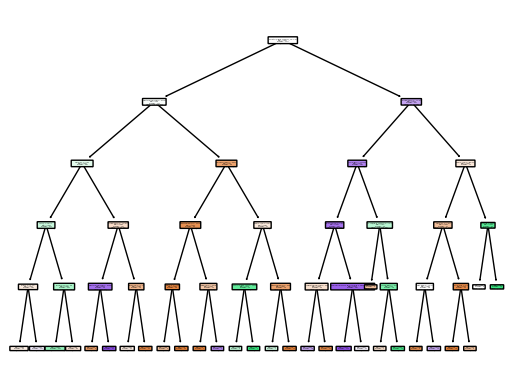

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


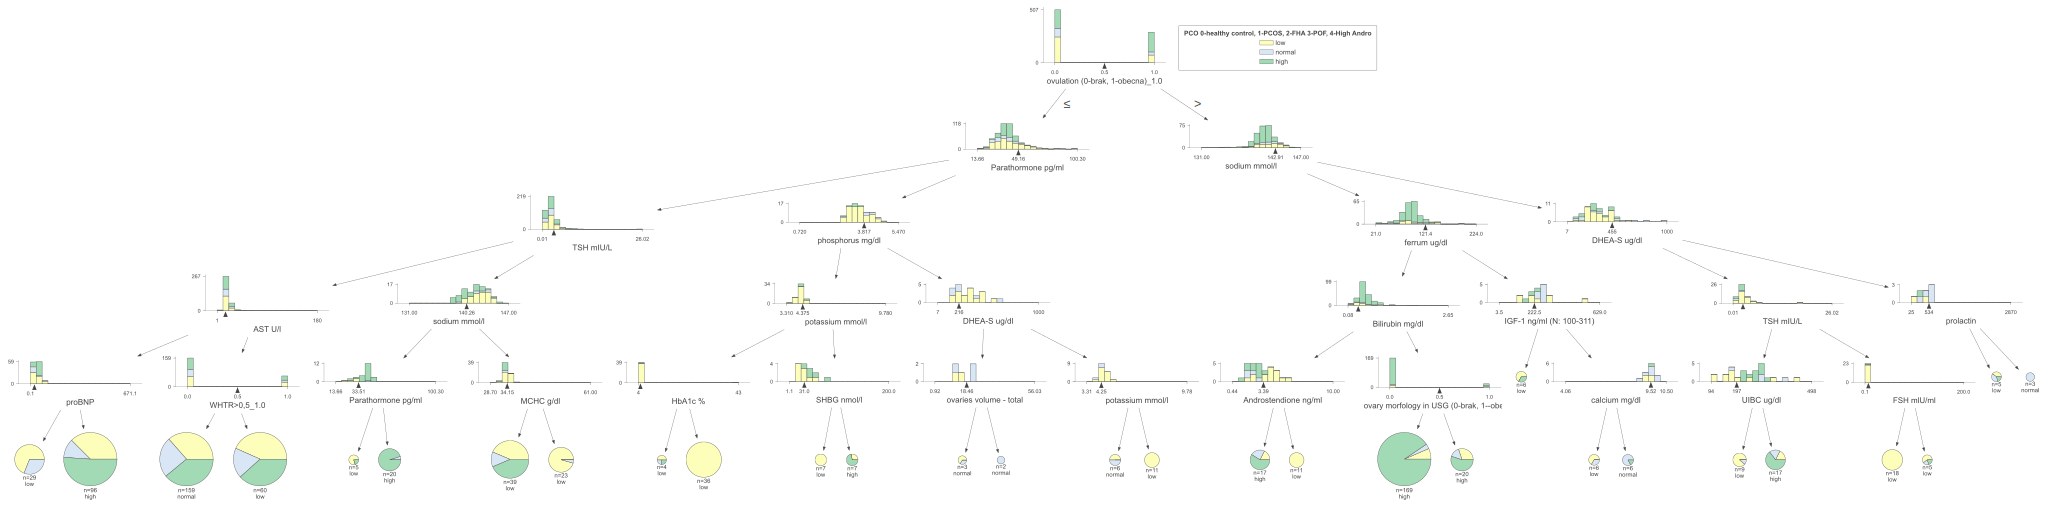

In [12]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, VIT_D_DISCRETE, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

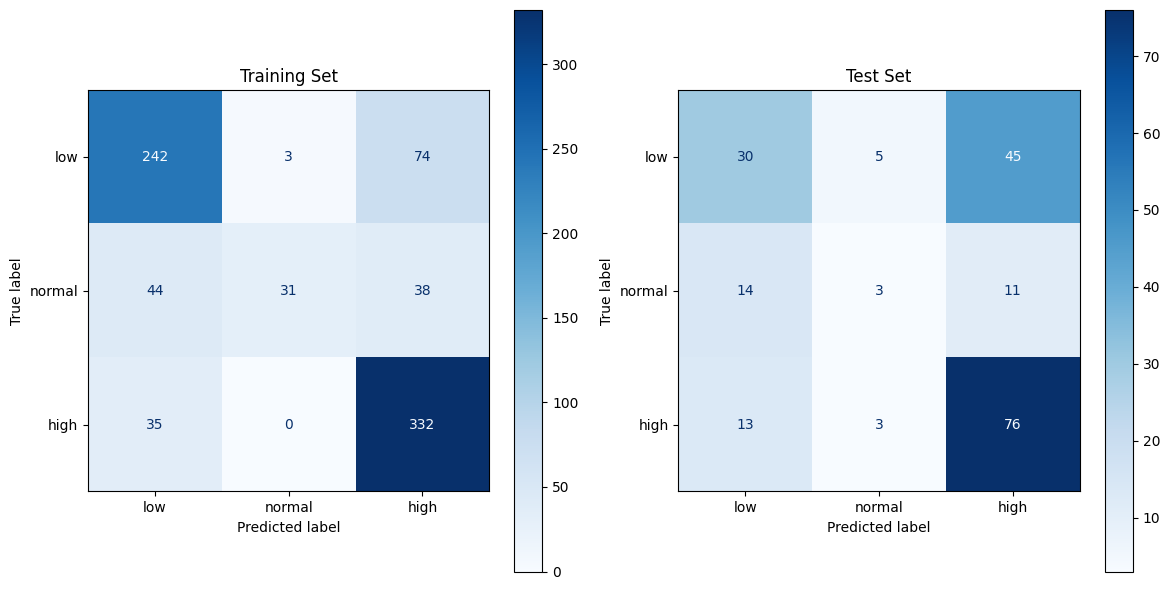

Training set
              precision    recall  f1-score   support

         low       0.75      0.76      0.76       319
      normal       0.91      0.27      0.42       113
        high       0.75      0.90      0.82       367

    accuracy                           0.76       799
   macro avg       0.80      0.65      0.67       799
weighted avg       0.77      0.76      0.74       799

Test set
              precision    recall  f1-score   support

         low       0.53      0.38      0.44        80
      normal       0.27      0.11      0.15        28
        high       0.58      0.83      0.68        92

    accuracy                           0.55       200
   macro avg       0.46      0.44      0.42       200
weighted avg       0.51      0.55      0.51       200



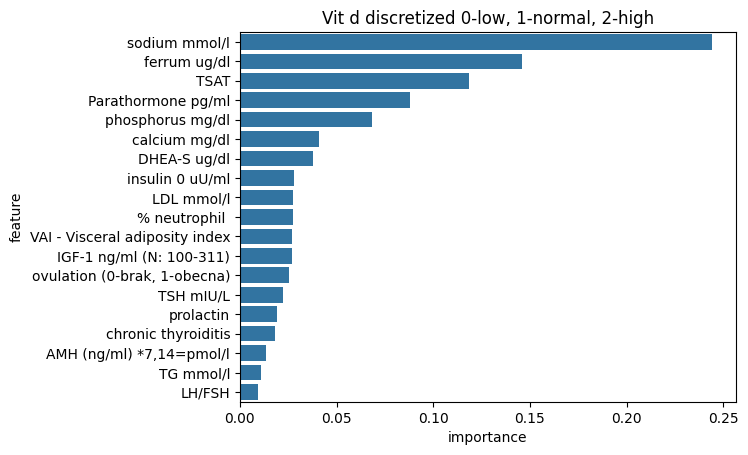

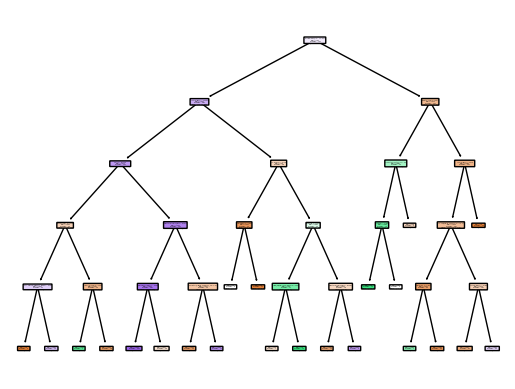

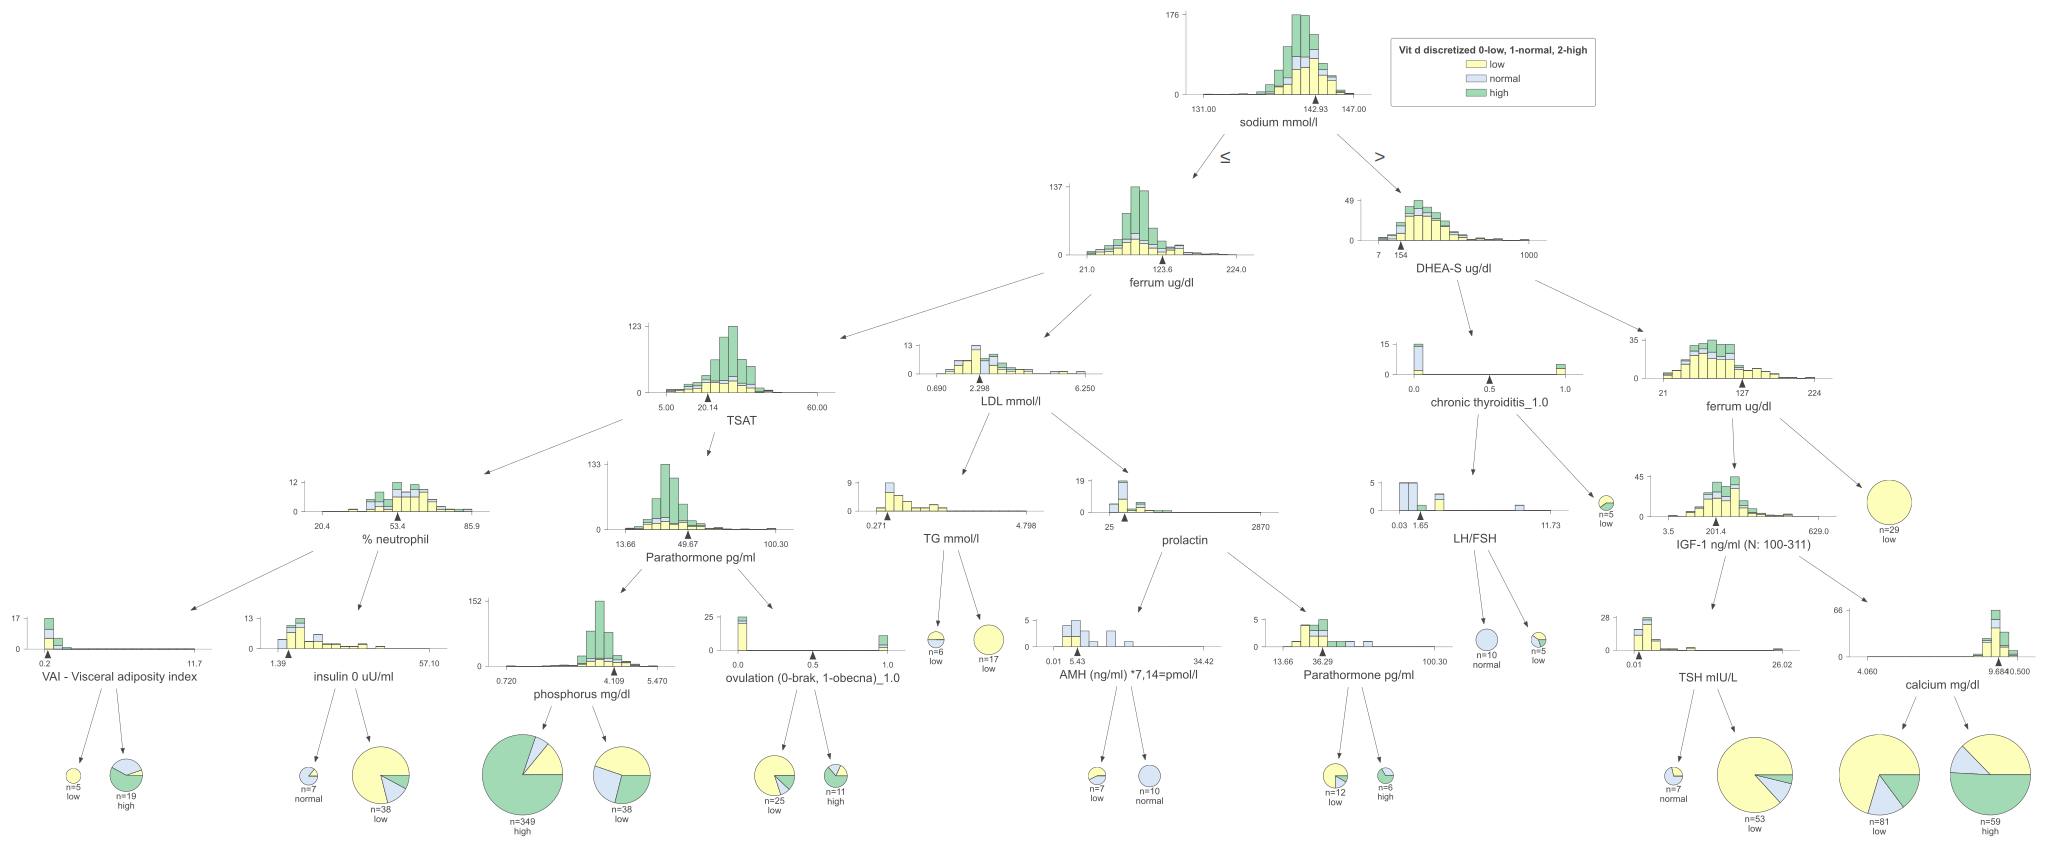

In [42]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, min_samples_split=6, class_weight=None, splitter='best')

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, VIT_D_DISCRETE, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, VIT_D_DISCRETE, CLASS_NAMES)

### RandomForest

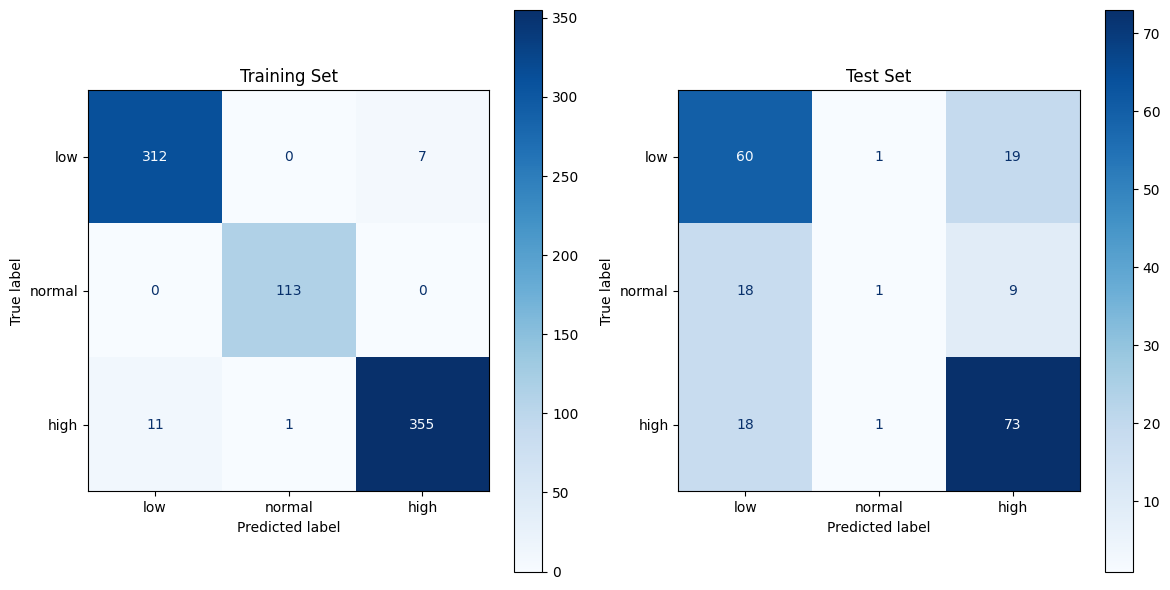

Training set
              precision    recall  f1-score   support

         low       0.97      0.98      0.97       319
      normal       0.99      1.00      1.00       113
        high       0.98      0.97      0.97       367

    accuracy                           0.98       799
   macro avg       0.98      0.98      0.98       799
weighted avg       0.98      0.98      0.98       799

Test set
              precision    recall  f1-score   support

         low       0.62      0.75      0.68        80
      normal       0.33      0.04      0.06        28
        high       0.72      0.79      0.76        92

    accuracy                           0.67       200
   macro avg       0.56      0.53      0.50       200
weighted avg       0.63      0.67      0.63       200



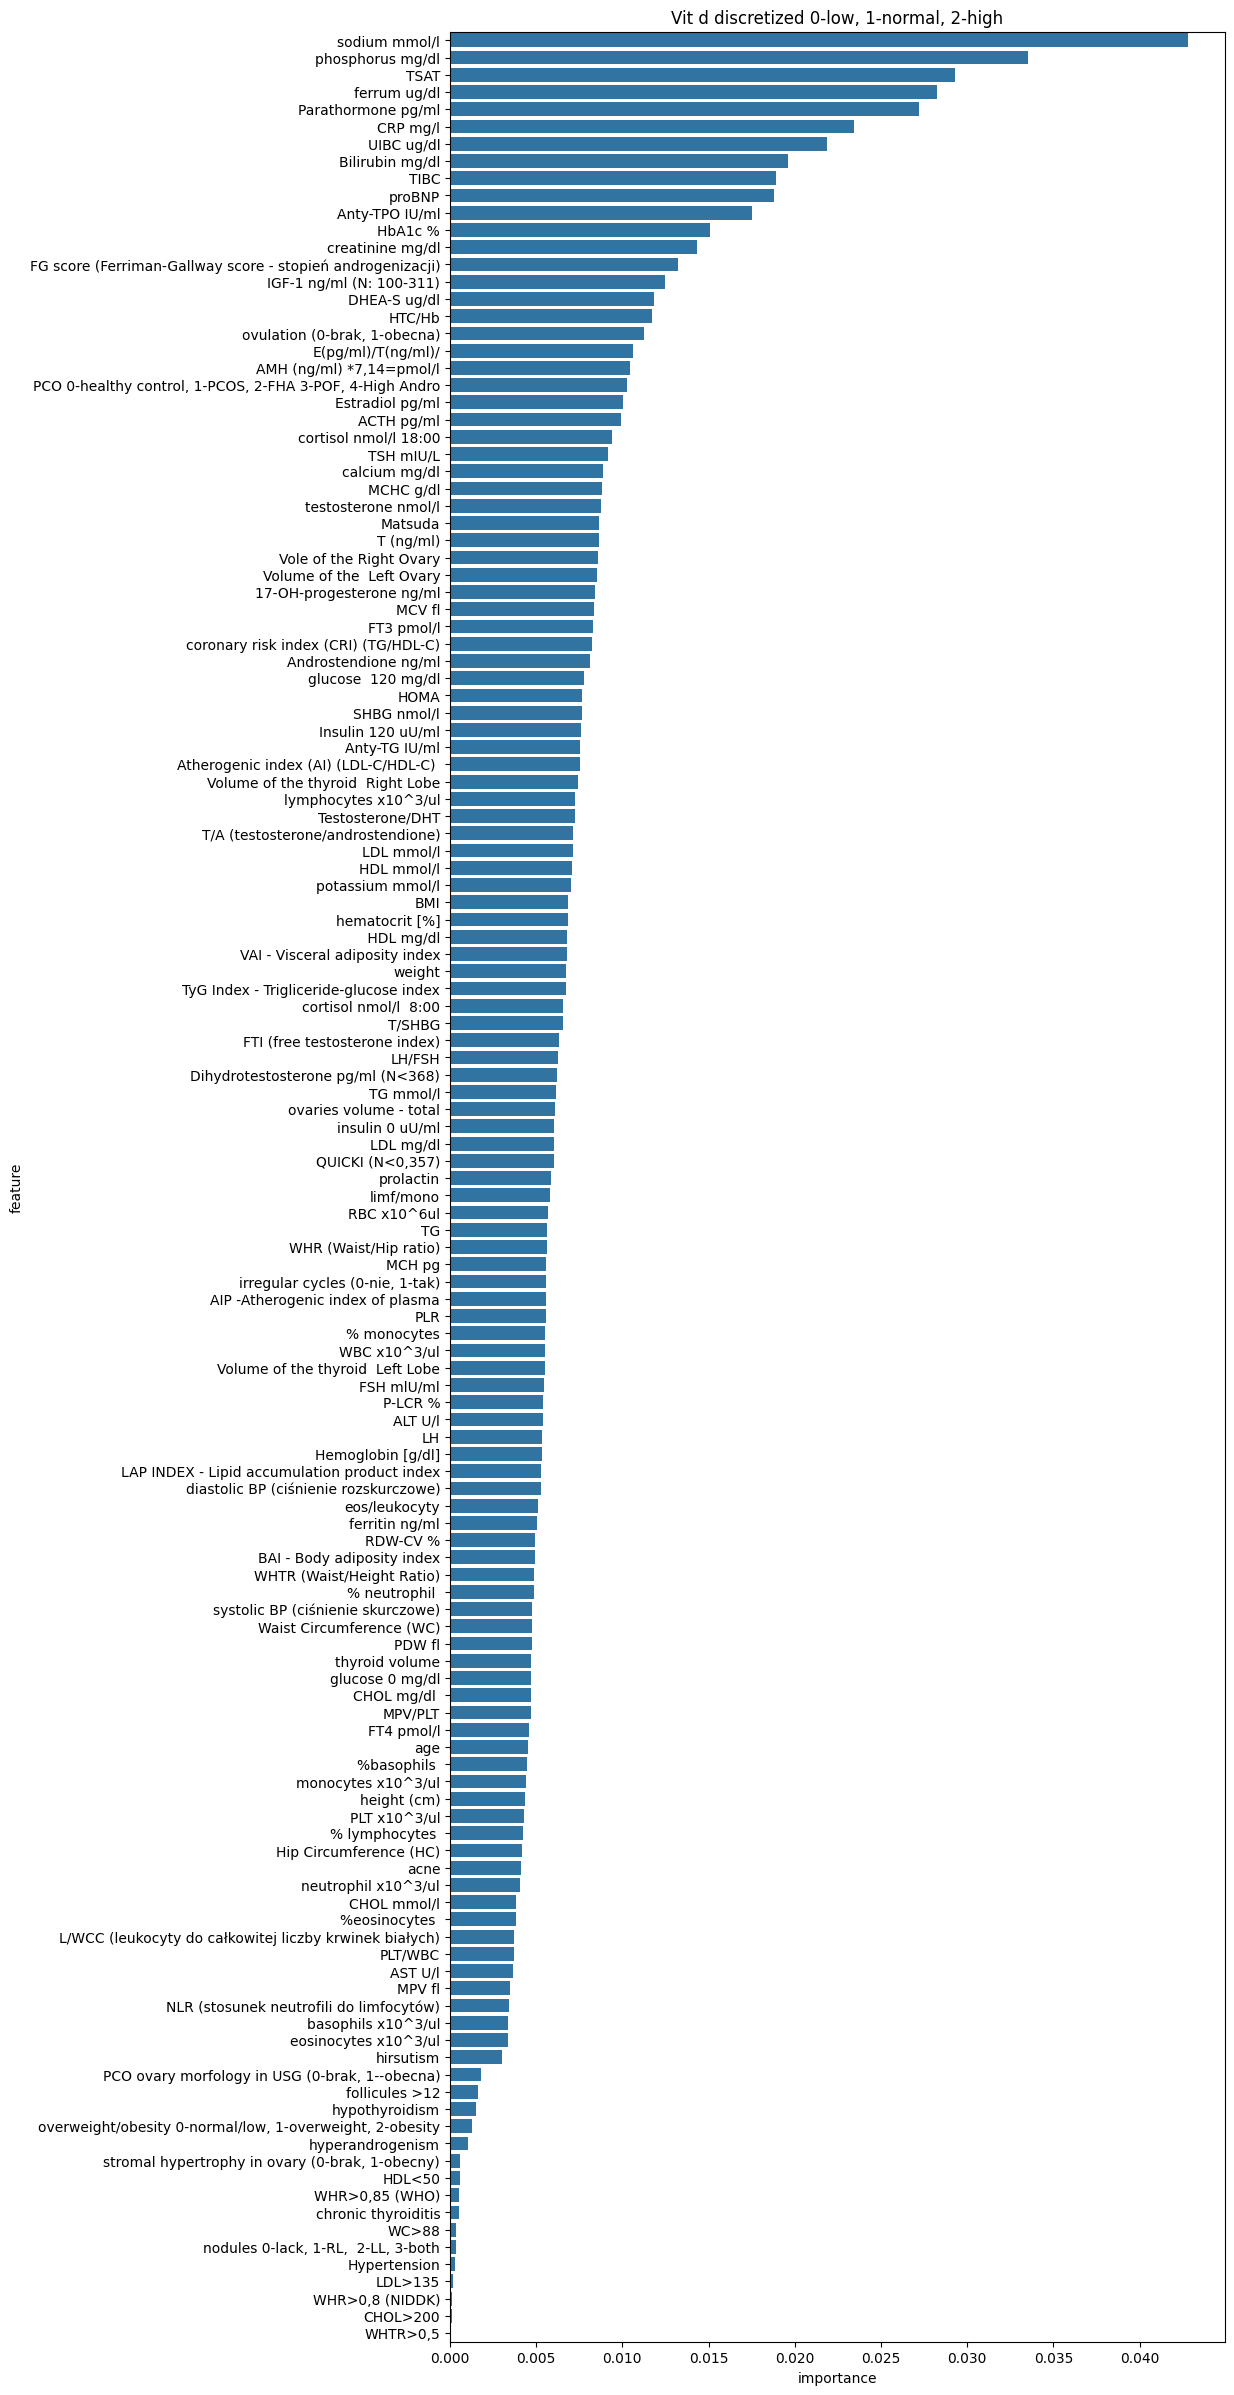

In [41]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=7, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, VIT_D_DISCRETE, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

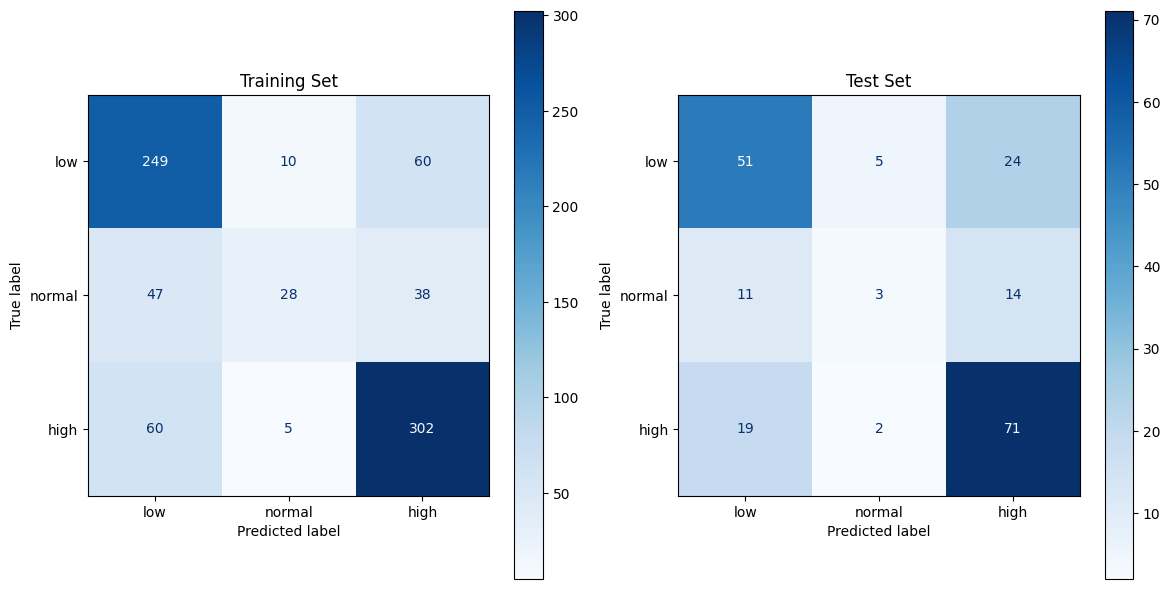

Training set
              precision    recall  f1-score   support

         low       0.70      0.78      0.74       319
      normal       0.65      0.25      0.36       113
        high       0.76      0.82      0.79       367

    accuracy                           0.72       799
   macro avg       0.70      0.62      0.63       799
weighted avg       0.72      0.72      0.71       799

Test set
              precision    recall  f1-score   support

         low       0.63      0.64      0.63        80
      normal       0.30      0.11      0.16        28
        high       0.65      0.77      0.71        92

    accuracy                           0.62       200
   macro avg       0.53      0.51      0.50       200
weighted avg       0.59      0.62      0.60       200



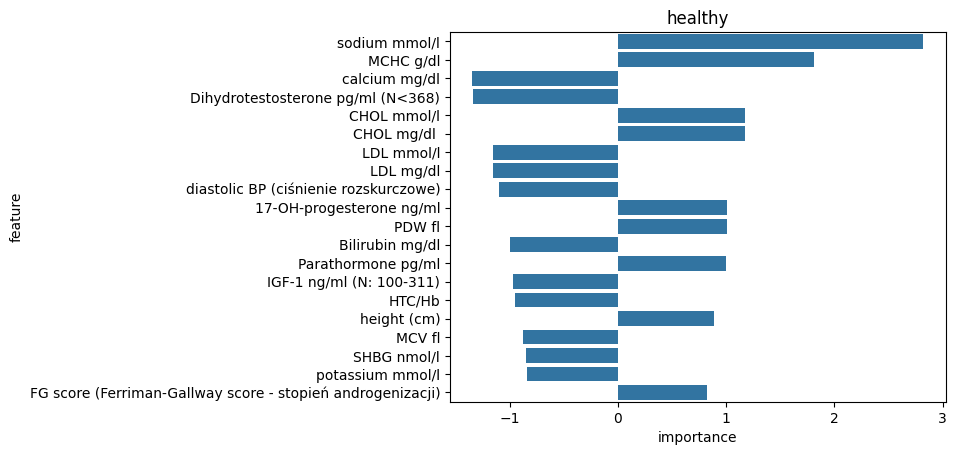

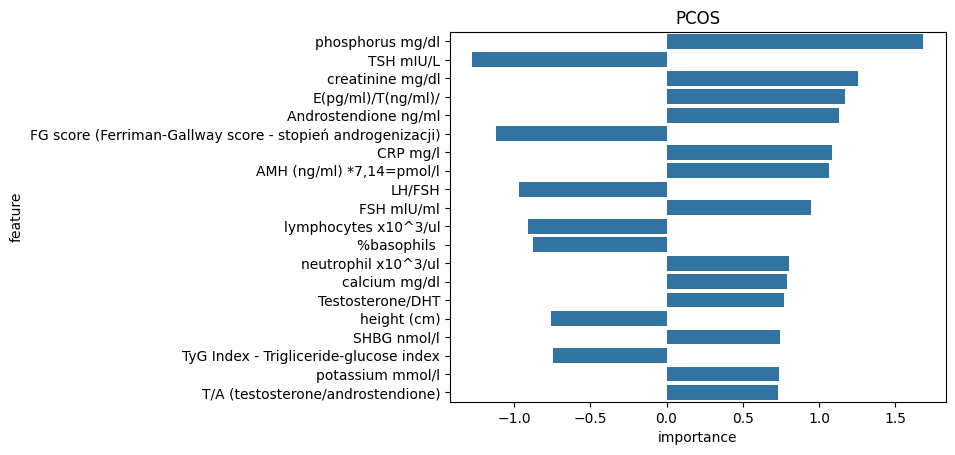

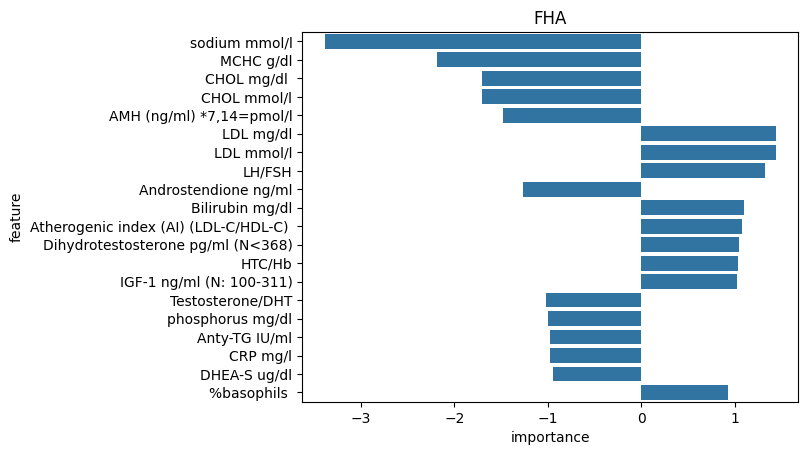

In [43]:
model_lr = LogisticRegression(C=2, multi_class='multinomial', max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, VIT_D_DISCRETE, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [44]:
selected_features_map = {}

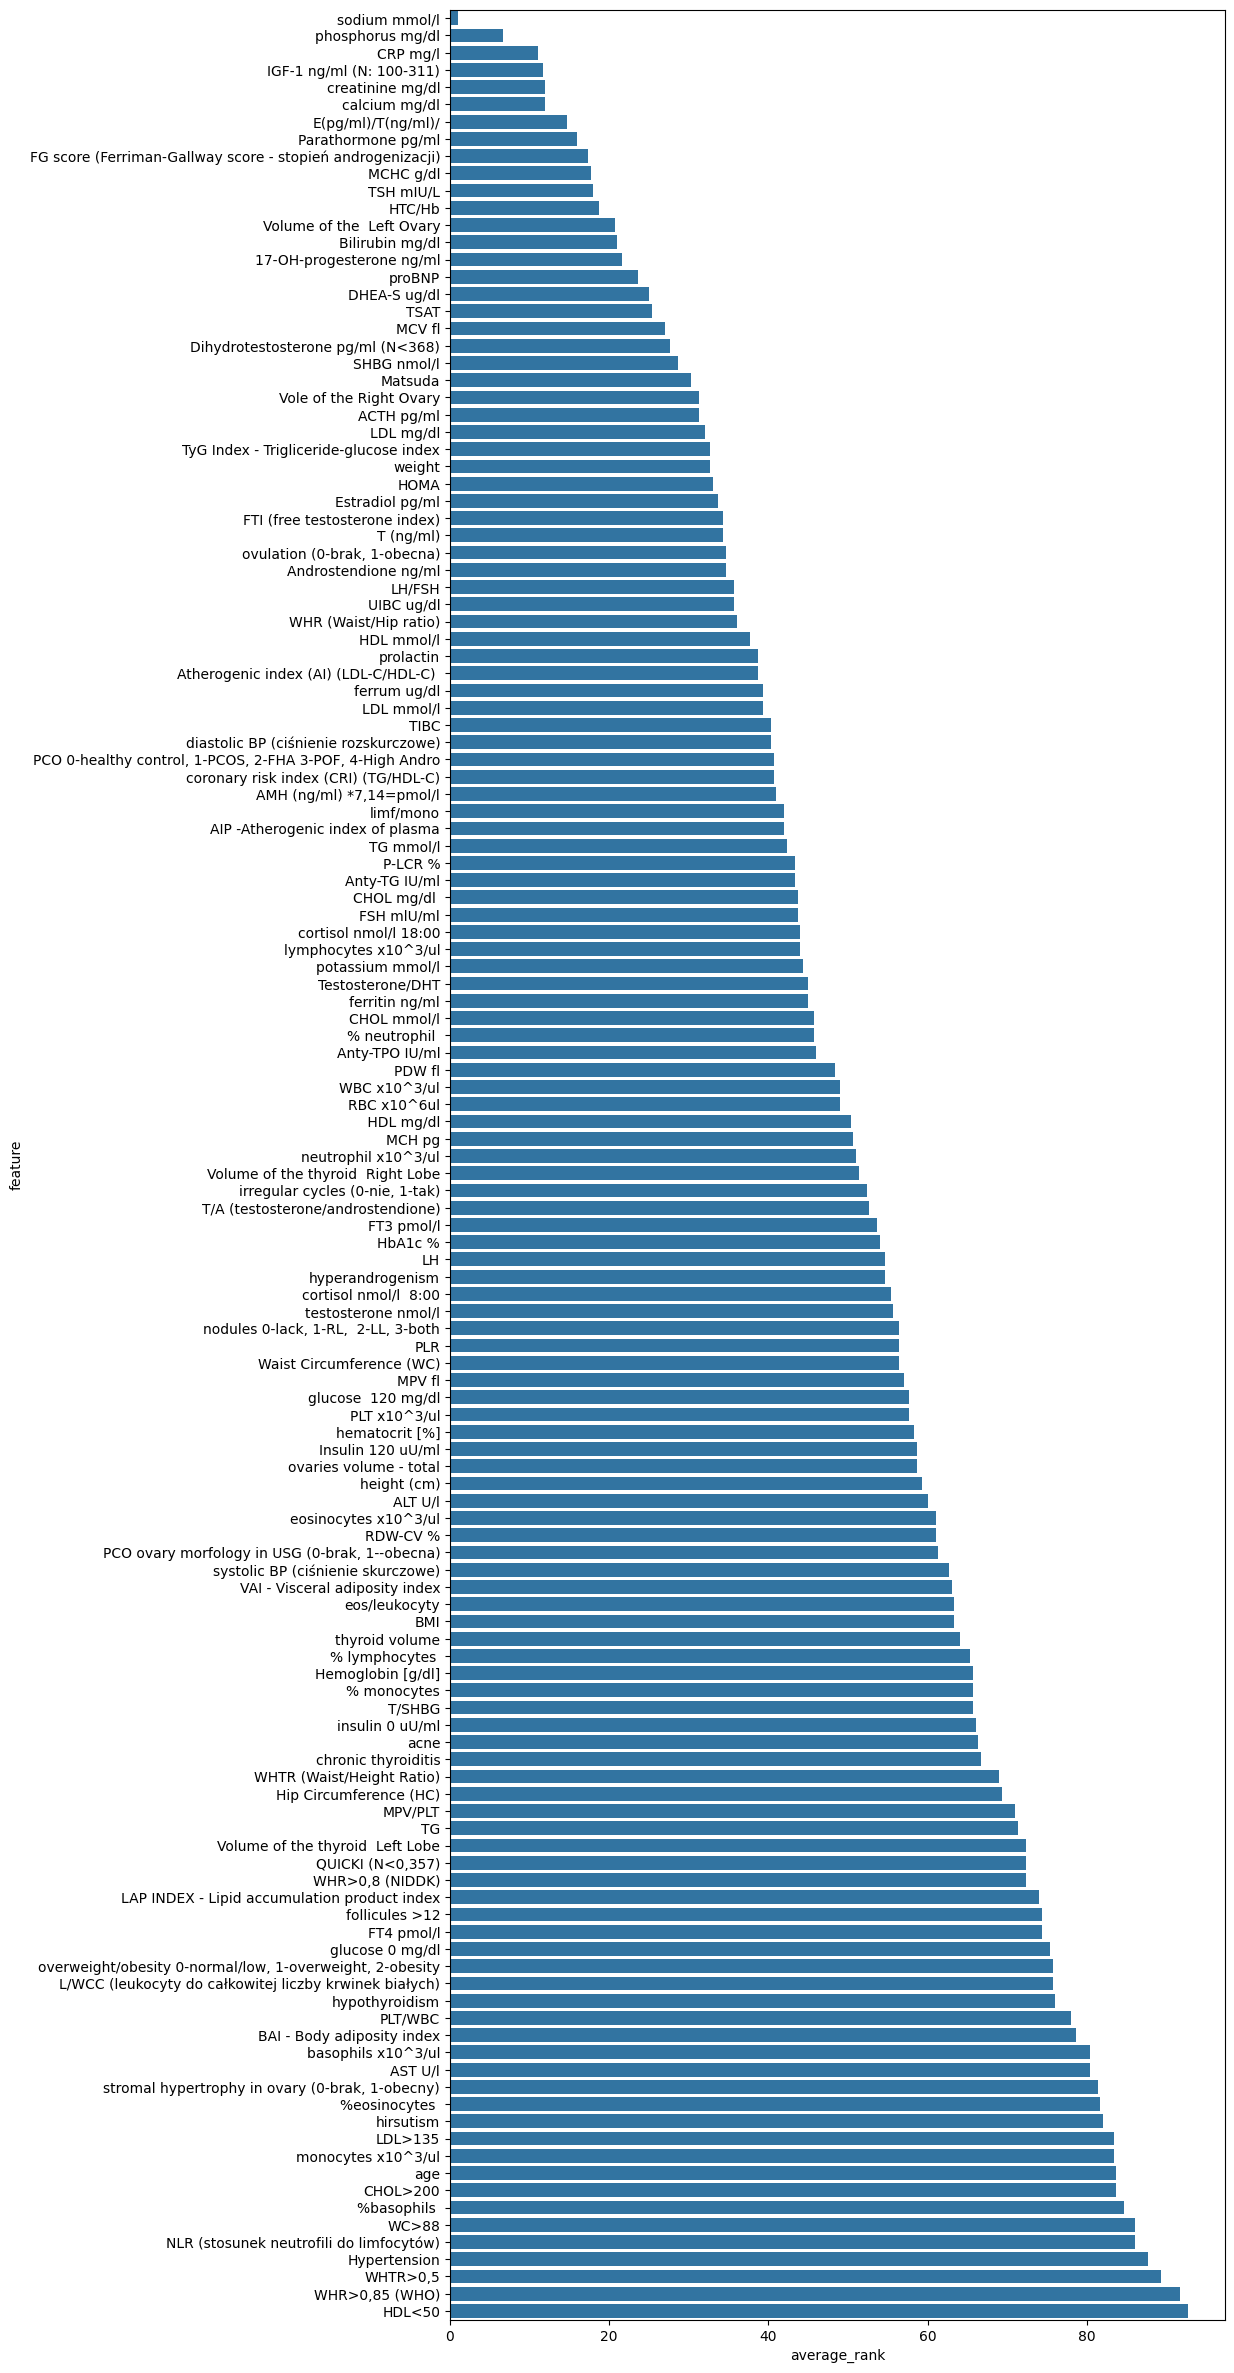

In [45]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [46]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 41 features:


['sodium mmol/l',
 'phosphorus mg/dl',
 'CRP mg/l',
 'IGF-1 ng/ml (N: 100-311)',
 'creatinine mg/dl',
 'calcium mg/dl',
 'E(pg/ml)/T(ng/ml)/',
 'Parathormone pg/ml',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'MCHC g/dl',
 'TSH mIU/L',
 'HTC/Hb',
 'Volume of the  Left Ovary',
 'Bilirubin mg/dl',
 '17-OH-progesterone ng/ml',
 'proBNP',
 'DHEA-S ug/dl',
 'TSAT',
 'MCV fl',
 'Dihydrotestosterone pg/ml (N<368)',
 'SHBG nmol/l',
 'Matsuda',
 'Vole of the Right Ovary',
 'ACTH pg/ml',
 'LDL mg/dl',
 'TyG Index - Trigliceride-glucose index',
 'weight',
 'HOMA',
 'Estradiol pg/ml',
 'FTI (free testosterone index)',
 'T (ng/ml)',
 'ovulation (0-brak, 1-obecna)',
 'Androstendione ng/ml',
 'LH/FSH',
 'UIBC ug/dl',
 'WHR (Waist/Hip ratio)',
 'HDL mmol/l',
 'prolactin',
 'Atherogenic index (AI) (LDL-C/HDL-C) ',
 'ferrum ug/dl',
 'LDL mmol/l']

## Feature selection

### Chi 2

In [ ]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), VIT_D_DISCRETE, continuous_preprocessor, categorical_preprocessor, X_train, y_train)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

In [ ]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, VIT_D_DISCRETE, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

In [ ]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, VIT_D_DISCRETE, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

### Gini index

In [ ]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(VIT_D_DISCRETE, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

#  NOTE: we don't consider it as a constraint because it would select either one feature or all of them
# selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

### Permutation importance

In [ ]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, VIT_D_DISCRETE, threshold=0.005)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [ ]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

In [ ]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)